<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°072


## I.- Problema 01


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>


El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

#### Distribución de los datos

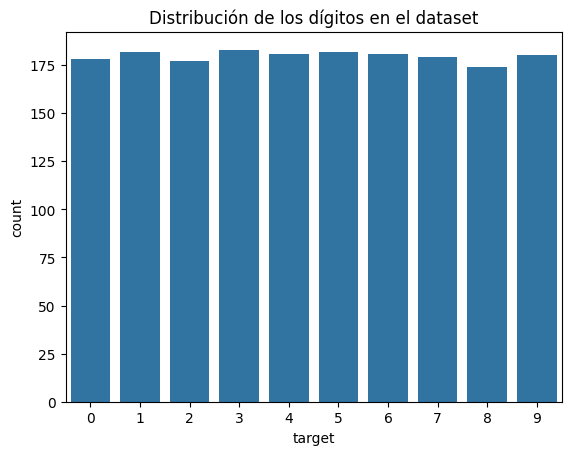

In [6]:
# Distribución de las clases
sns.countplot(x='target', data=digits)
plt.title('Distribución de los dígitos en el dataset')
plt.show()

In [7]:
print(digits.describe())

          c00          c01          c02          c03          c04  \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

               c05          c06          c07          c08          c09  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     

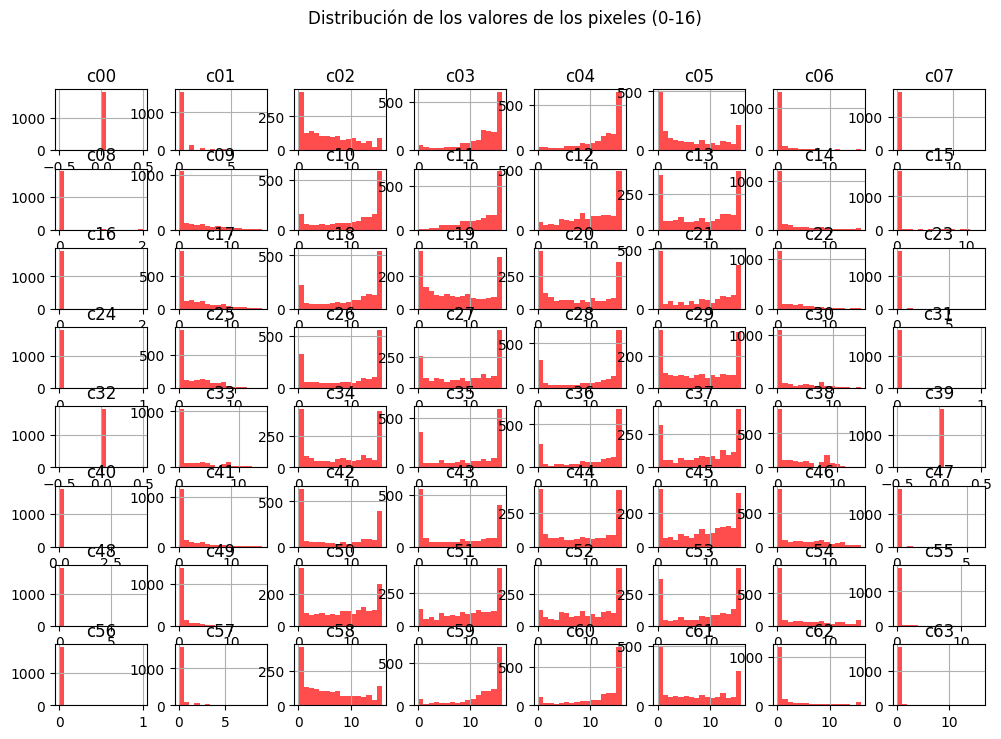

In [8]:
# Distribución de los valores de los pixeles
digits.drop('target', axis=1).hist(bins=16, figsize=(12, 8), color='red', alpha=0.7)
plt.suptitle('Distribución de los valores de los pixeles (0-16)')
plt.show()

####Memoria Utilizada

In [9]:
mem = digits.memory_usage(deep=True).sum() / 1024 ** 2  # Convertimos a MB
print(f'Memoria utilizada por el dataset: {mem:.2f} MB')

Memoria utilizada por el dataset: 0.89 MB


#### Tipo de Datos

In [10]:
print(digits.dtypes)

c00       int64
c01       int64
c02       int64
c03       int64
c04       int64
          ...  
c60       int64
c61       int64
c62       int64
c63       int64
target    int64
Length: 65, dtype: object


#### Registros por clase

In [11]:
print(digits['target'].value_counts())

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64


#### Registros inusuales

Buscamos valores nulos

In [12]:
print(digits.isnull().sum())

c00       0
c01       0
c02       0
c03       0
c04       0
         ..
c60       0
c61       0
c62       0
c63       0
target    0
Length: 65, dtype: int64


Además, buscamos valores que no estén en el rango de píxeles.

In [13]:
unusual_values = digits.drop('target', axis=1).apply(lambda x: (x < 0) | (x > 16)).sum()
print(f'Número de valores fuera del rango 0-16 en cada columna:\n{unusual_values}')

Número de valores fuera del rango 0-16 en cada columna:
c00    0
c01    0
c02    0
c03    0
c04    0
      ..
c59    0
c60    0
c61    0
c62    0
c63    0
Length: 64, dtype: int64


### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [14]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

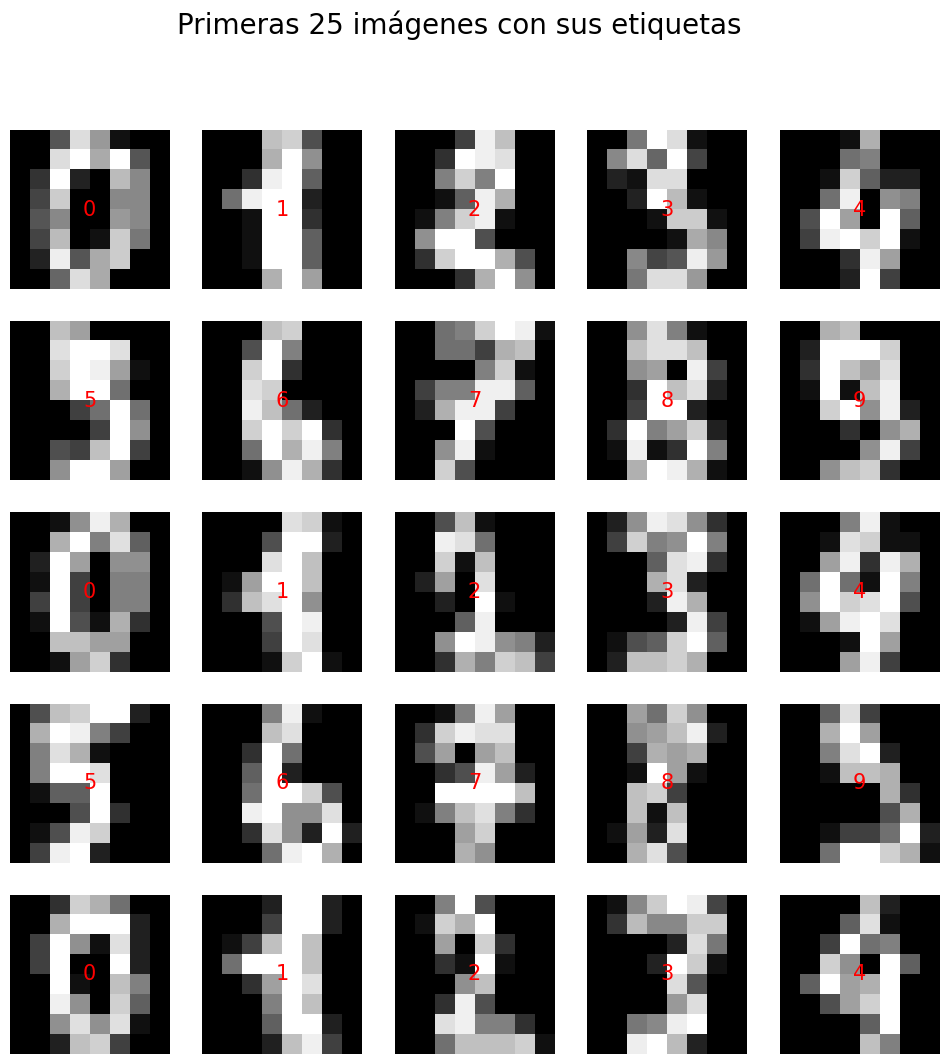

In [15]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

# Mostrar las primeras 25 imágenes
for i in range(nx):
    for j in range(ny):
        index = i * ny + j

        axs[i, j].imshow(digits_dict["images"][index], cmap='gray')  # Mostrar la imagen

        axs[i, j].axis('off')    # Desactivar los ejes

        axs[i, j].text(0.5, 0.5, str(digits_dict["target"][index]),  # Mostrar el label
                       color="red", fontsize=15,
                       ha='center', va='center',
                       transform=axs[i, j].transAxes)

plt.suptitle('Primeras 25 imágenes con sus etiquetas', fontsize=20)
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


#### Modelo de Regresión Logística

**Train y Test**

In [16]:
X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de testeo: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 1437
Tamaño del conjunto de testeo: 360


**Creación del Modelo**

In [17]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

**Predicciones y métricas**

In [18]:
y_pred_log = log_reg.predict(X_test)

# Métricas
resultados_log = {
    'Accuracy': accuracy_score(y_test, y_pred_log),
    'Precision': precision_score(y_test, y_pred_log, average='weighted'),
    'Recall': recall_score(y_test, y_pred_log, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_log, average='weighted')
}

print(f"Resultados de Regresión Logística: {resultados_log}")

Resultados de Regresión Logística: {'Accuracy': 0.975, 'Precision': 0.9754780751086168, 'Recall': 0.975, 'F1-Score': 0.9751092427666409}


**Matriz de confusión**

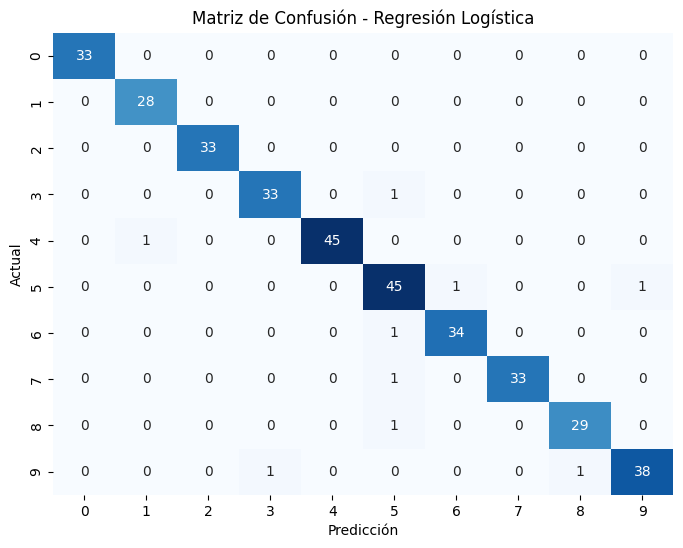

In [19]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

#### Modelo KNN

**Train y Test**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Creación del Modelo**

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Predicción y métricas**

In [22]:
y_pred_knn = knn.predict(X_test)

# Métricas
resultados_knn = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn, average='weighted'),
    'Recall': recall_score(y_test, y_pred_knn, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_knn, average='weighted')
}

print(f"Resultados de KNN: {resultados_knn}")

Resultados de KNN: {'Accuracy': 0.9861111111111112, 'Precision': 0.9861869867863546, 'Recall': 0.9861111111111112, 'F1-Score': 0.9860800746632832}


**Matriz de confusión**

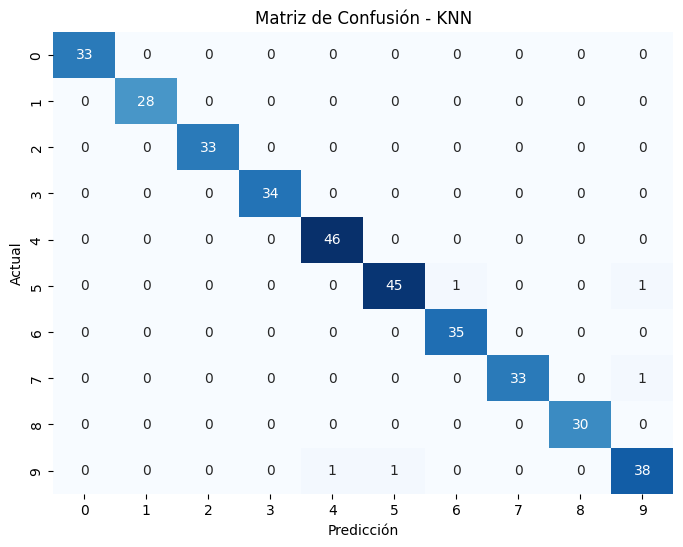

In [23]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

#### Modelo Árbol de Desición

**Train y Test**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Creación del Modelo**

In [25]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

**Predicción y métricas**

In [26]:
y_pred_tree = tree.predict(X_test)

# Métricas
resultados_tree = {
    'Accuracy': accuracy_score(y_test, y_pred_tree),
    'Precision': precision_score(y_test, y_pred_tree, average='weighted'),
    'Recall': recall_score(y_test, y_pred_tree, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_tree, average='weighted')
}

print(f"Resultados de Árbol de Decisión: {resultados_tree}")

Resultados de Árbol de Decisión: {'Accuracy': 0.8527777777777777, 'Precision': 0.8578156856770686, 'Recall': 0.8527777777777777, 'F1-Score': 0.8521186704951098}


**Matriz de confusión**

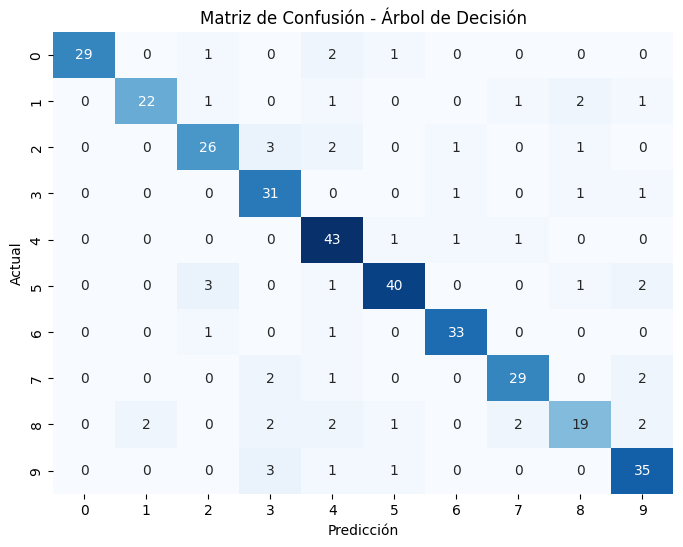

In [27]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

De los resultados entregados podemos observar que el mejor modelo es el KNN, ya que es el que tiene mejo precisión en las métricas, sobretodo en la F1 score.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [29]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Resultados donde el valor predicho y el original son IGUALES:


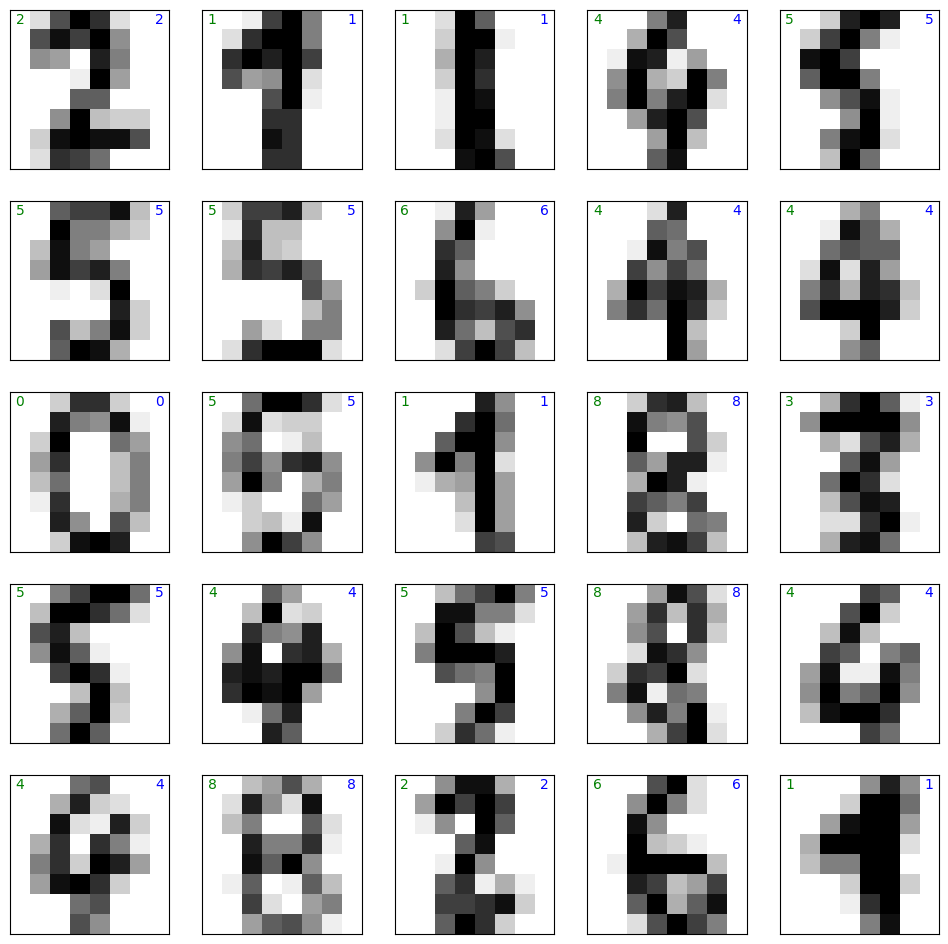

In [30]:
print("Resultados donde el valor predicho y el original son IGUALES:")
mostrar_resultados(digits, knn, nx=5, ny=5, label="correctos")


Resultados donde el valor predicho y el original son DISTINTOS:


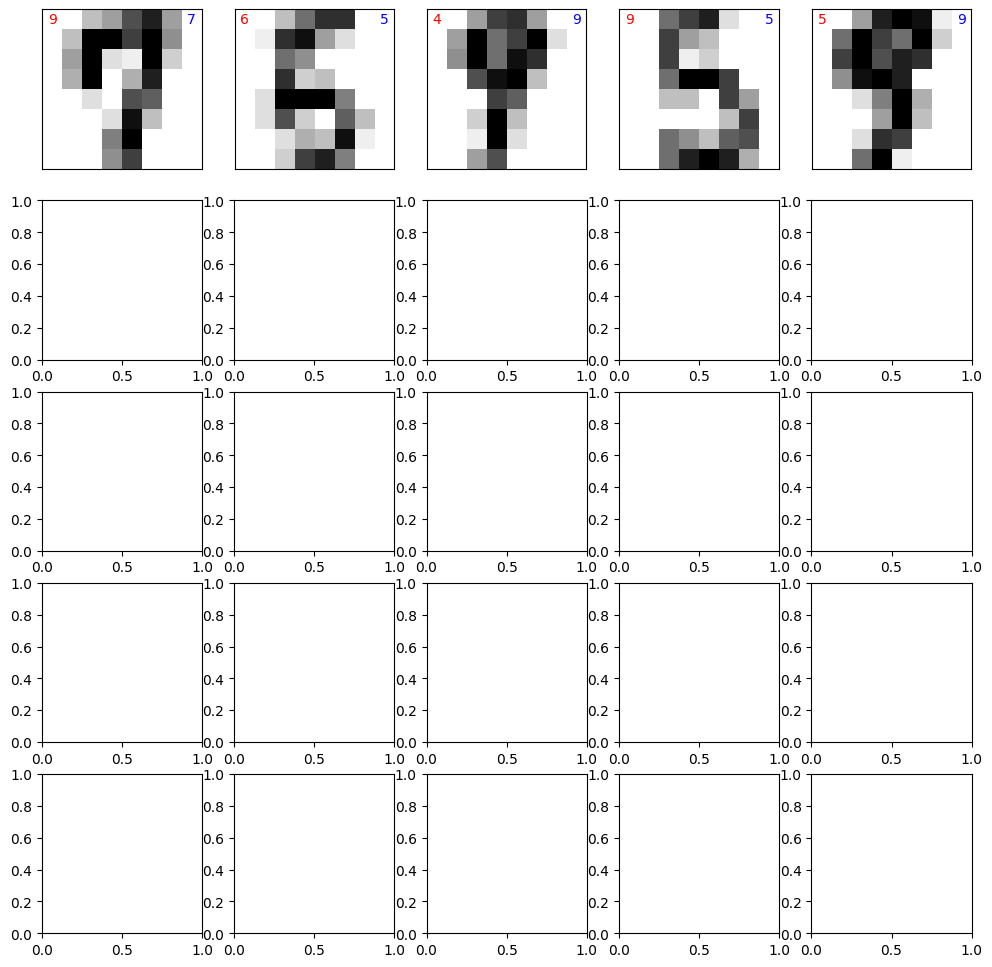

In [31]:
print("\nResultados donde el valor predicho y el original son DISTINTOS:")
mostrar_resultados(digits, knn, nx=5, ny=5, label="incorrectos")

Estos errores se deben a que en algunas imagenes como bien se ve existe mucha similitud entre los dígitos, o también puede deberse al ruido que traen las imagenes, cxomo se ve en el caso de la tercera y quinta imagen que no se distingue un número claro.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.